# 1. What are the traits of constituents that give gifts/donations?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import cpi 
cpi.update()

In [2]:
# Load dataset
data = pd.read_csv('./Resources/constituents.csv')
data

,ConstituentID,City,State,Postcode,Country,Constituent type,Constituent codes,Lifetime giving,First gift amount,First gift type,...,Education,Gender,Marital status,Solicit codes,Student Organizations,Arts,Fraternal Organizations,Men's Athletics,Scholarship Recipient,Women's Athletics
0,60472,Superior,WI,54880-2556,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43735,Hermantown,MN,55811-1755,United States,Organization,Other Organizations (8/29/2012 - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60145,Esko,MN,55733-9645,United States,Organization,Other Organizations (No start date - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21332,NaN,NaN,NaN,United States,Organization,Business (No start date - No end date),25,25,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50410,Superior,WI,54880-1504,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,46217,Duluth,MN,55808-1945,United States,Individual,Attended Didn't Graduate (No start date - No e...,75,75,One-time gift,...,"UW-Superior,Not primary,Business Administratio...",Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Track & Field (No date)
50909,46390,Duluth,MN,55808-1725,United States,Individual,Former Parent (No start date - No end date),0,NaN,NaN,...,NaN,Male,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50910,50122,Duluth,MN,55808-1737,United States,Individual,Alumni (No start date - No end date),0,NaN,NaN,...,"UW-Superior,Primary,Physical Education,BS,2014",Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50911,59551,Centuria,WI,54824-7721,United States,Individual,Parent (No start date - No end date),0,NaN,NaN,...,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['Greatest gift amount']

0        NaN
1         50
2         50
3         25
4        NaN
        ... 
50908     75
50909    NaN
50910    NaN
50911    NaN
50912    NaN
Name: Greatest gift amount, Length: 50913, dtype: object

### Calculating age at time of first donation

In [4]:
#Convert birthdates and date of first donation to dt type variables 
data['First gift date'] = pd.to_datetime(data['First gift date'], format='%m/%d/%Y', errors='coerce') 
data['Birthdate'] = pd.to_datetime(data['Birthdate'], format='%m/%d/%Y', errors='coerce')

In [5]:
# Calculating difference/Creation of age at first donation variable 
data['Age_FirstDonation'] = data['First gift date'] - data['Birthdate'] 

In [6]:
# Checking the number of complete values in the new column.
row_Num =data.shape[0]
na_vals = data['Age_FirstDonation'].isnull().sum()
complete = row_Num - na_vals
print(f"Number of rows with values in Age_FirstDonation column: {complete}")

#Getting rid of error -- negative age
data = data[data['Age_FirstDonation'] >= pd.Timedelta(0)]
data['Age_FirstDonation'].describe()

Number of rows with values in Age_FirstDonation column: 3043


count                             3041
mean     14172 days 06:06:59.072673536
std       4737 days 06:52:00.713846656
min                 1933 days 00:00:00
25%                10511 days 00:00:00
50%                13801 days 00:00:00
75%                17288 days 00:00:00
max                32329 days 00:00:00
Name: Age_FirstDonation, dtype: object

In [7]:
# Convert to years 
data['Age_FirstDonation'] = data['Age_FirstDonation'].dt.days/365.25 
data['Age_FirstDonation'].describe()

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\656762593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_FirstDonation'] = data['Age_FirstDonation'].dt.days/365.25


count    3041.000000
mean       38.801519
std        12.969983
min         5.292266
25%        28.777550
50%        37.785079
75%        47.331964
max        88.511978
Name: Age_FirstDonation, dtype: float64

# More data preprocessing

In [8]:
# Extract the last 4 digits as graduation year
data['graduation_year'] = data['Education'].str.extract(r'(\d{4})').fillna('0000')

# Convert 'graduation_year' to numeric (optional, if needed for further analysis)
data['graduation_year'] = pd.to_numeric(data['graduation_year'], errors='coerce', downcast='integer')

# For missing years (NaNs after conversion), fill with 0 or '0000'
data['graduation_year'] = data['graduation_year'].fillna(0).astype(int)

# Remove the last 4 digits (year) from the 'Education' column
data['Education'] = data['Education'].str.replace(r',\d{4}$', '', regex=True)

# Check the result
print(data[['Education', 'graduation_year']].head())

                                            Education  graduation_year
13          UW-Superior,Primary,Physical Education,BS             2013
19        UW-Superior,Primary,Elementary Education,BS             2007
62          UW-Superior,Primary,Social Work,No degree             1994
72  UW-Superior,Primary,Business Admin: Internatio...             1995
88  UW-Superior,Primary,Visual Arts-BFA/GraphicArt...             2004


C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\2496754627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['graduation_year'] = data['Education'].str.extract(r'(\d{4})').fillna('0000')
C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\2496754627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['graduation_year'] = pd.to_numeric(data['graduation_year'], errors='coerce', downcast='integer')
C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\2496754627.py:8: SettingWithCopyWarning: 
A value i

In [9]:
# Data preprocessing
#data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
#data['Marital status'] = LabelEncoder().fit_transform(data['Marital status'])
data['Education'] = LabelEncoder().fit_transform(data['Education'])

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\3818623858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = LabelEncoder().fit_transform(data['Education'])


In [10]:
# Convert custom fields to numeric, handling missing values and non-numeric entries
custom_fields = ['Student Organizations', 'Arts', 'Fraternal Organizations', 
                 'Men\'s Athletics', 'Women\'s Athletics', 'Scholarship Recipient']

for field in custom_fields:
    data[field] = pd.to_numeric(data[field], errors='coerce').fillna(0)

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\177372794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[field] = pd.to_numeric(data[field], errors='coerce').fillna(0)


In [11]:
#Unnecessary, handled by pd.getdummies later
'''
data['Marital status'].unique()
data['Marital status'] = data['Marital status'].replace({
    'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5, 'Engaged': 6, 'Separated': 7})
'''

"\ndata['Marital status'].unique()\ndata['Marital status'] = data['Marital status'].replace({\n    'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5, 'Engaged': 6, 'Separated': 7})\n"

In [12]:
# Convert Lifetime giving to numeric, handling any issues
data['Lifetime giving'] = pd.to_numeric(data['Lifetime giving'], errors='coerce').fillna(0)

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\611221729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Lifetime giving'] = pd.to_numeric(data['Lifetime giving'], errors='coerce').fillna(0)


In [13]:
# Feature engineering
data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(data['Latest gift date'])).dt.days
data['Frequency'] = data.groupby('ConstituentID')['Latest gift date'].transform('count')
data['MonetaryValue'] = data['Lifetime giving']
data['EngagementScore'] = data[custom_fields].sum(axis=1)

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\3521188297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(data['Latest gift date'])).dt.days
C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\3521188297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Frequency'] = data.groupby('ConstituentID')['Latest gift date'].transform('count')
C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\3521188297.py:4: SettingWithCopyWarning: 
A value is

In [14]:
# Create a Donor column (1 if the constituent is a donor, 0 otherwise)
data['Donor'] = (data['Lifetime giving'] > 0).astype(int)

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\2969901612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Donor'] = (data['Lifetime giving'] > 0).astype(int)


In [15]:
# Convert 'Constituent type' to one-hot encoded columns
data = pd.get_dummies(data, columns=['Constituent type'], drop_first=True)

### Creating variable for years since graduation 

In [16]:
# Extract the last 4 digits as graduation year
data['first_gift_year'] = pd.DatetimeIndex(data['First gift date']).year

# Convert 'first_gift_year' to numeric (optional, if needed for further analysis)
data['first_gift_year'] = pd.to_numeric(data['first_gift_year'], errors='coerce', downcast='integer')

# Create variable to describe time since graduation at first donation
data['years_post_grad_donation'] = data['first_gift_year'] - data['graduation_year']
data['years_post_grad_donation'] = data['years_post_grad_donation'].loc[(data['years_post_grad_donation'] >= 0) & (data['years_post_grad_donation'] <= 100)]
data['years_post_grad_donation'].describe()

count    2609.000000
mean       12.469912
std        10.714038
min         0.000000
25%         4.000000
50%        10.000000
75%        18.000000
max        66.000000
Name: years_post_grad_donation, dtype: float64

## Exploratory Data Analysis (EDA)

#### 1. Traits of constituents that give gifts/donations

In [17]:
# Donor only dataframe
donors = data[data['Donor'] == 1]

### Age Distribution of Donors

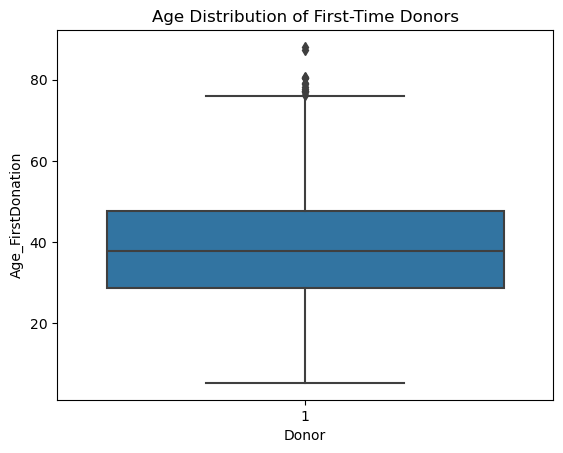

In [18]:
# Age Distribution of Donors at First Donation 
sns.boxplot(x='Donor', y='Age_FirstDonation', data=donors)
plt.title("Age Distribution of First-Time Donors")
plt.show()


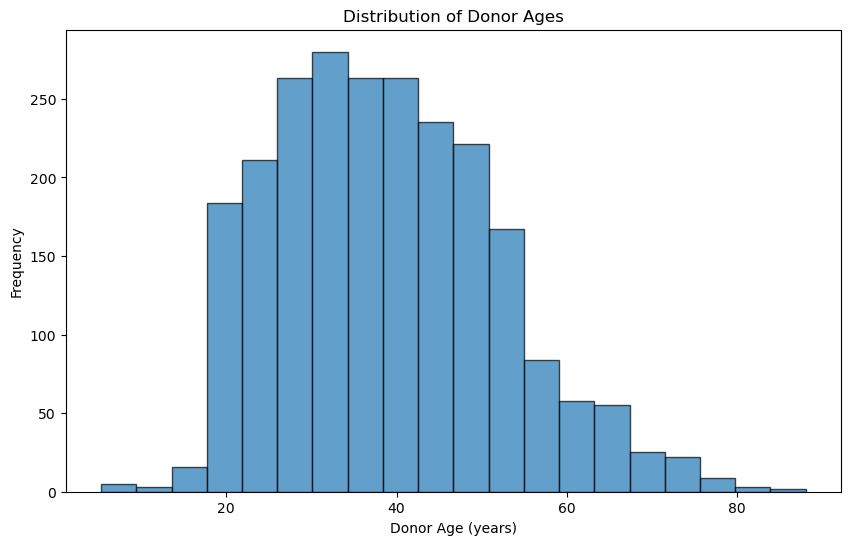

In [19]:
# Using my calculated Age variable. 
donors['Age_FirstDonation'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, figsize=(10, 6), title='Distribution of Donor Ages')

plt.xlabel('Donor Age (years)')
plt.ylabel('Frequency')
plt.show()

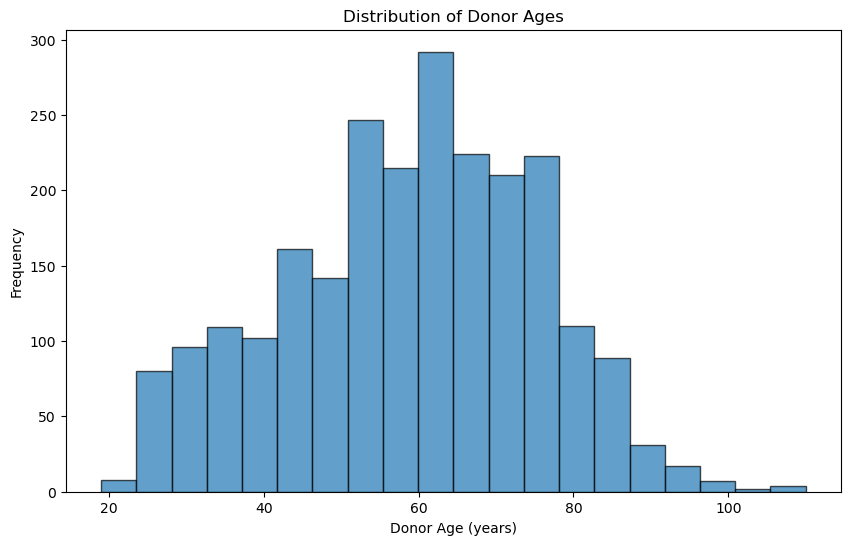

In [20]:
# Using Age Variable, not my calculated variable. 
donors['Age'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, figsize=(10, 6), title='Distribution of Donor Ages')

plt.xlabel('Donor Age (years)')
plt.ylabel('Frequency')
plt.show()

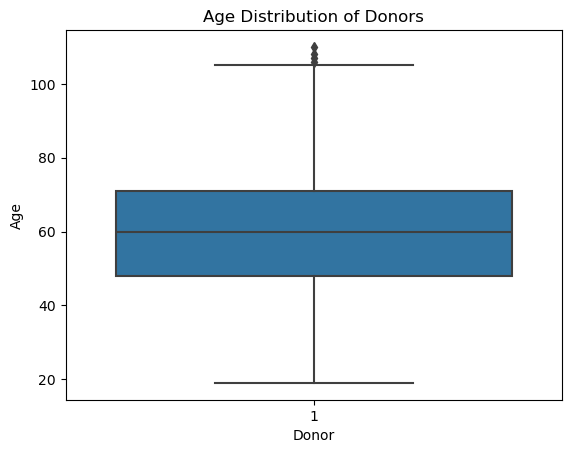

In [21]:
#Age Distribution
sns.boxplot(x='Donor', y='Age', data=donors)
plt.title("Age Distribution of Donors")
plt.show()


### Monetary Value and Donors

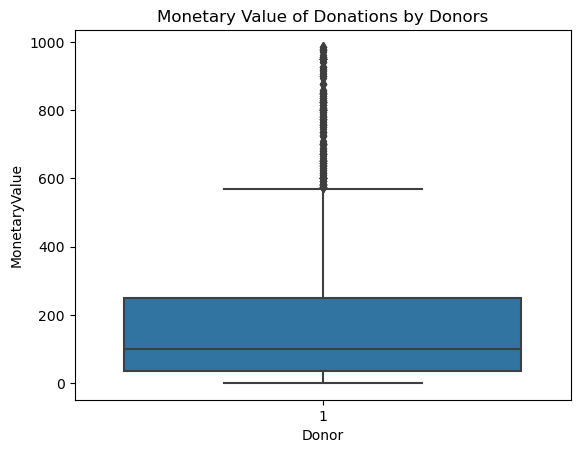

In [22]:
# Lifetime donation amount of donors
sns.boxplot(x='Donor', y='MonetaryValue', data=donors)
plt.title("Monetary Value of Donations by Donors")
plt.show()

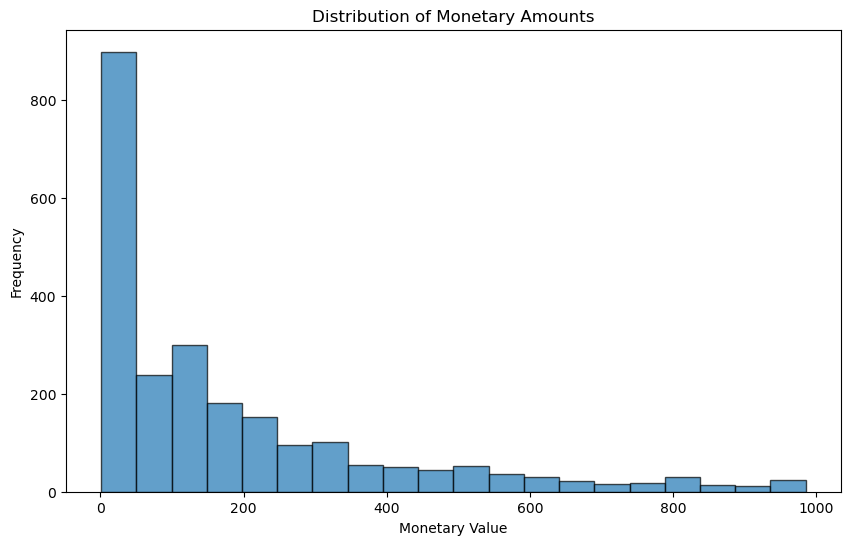

In [23]:
# Histogram of lifetime donation amounts
donors['MonetaryValue'].plot(kind='hist', bins =20, edgecolor='black', alpha=0.7, figsize=(10, 6), title='Distribution of Monetary Amounts')

plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\caleb\AppData\Local\Temp\ipykernel_16164\3453704986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donors['Greatest gift amount'] = donors['Greatest gift amount'].str.replace(',', '').astype(float).astype(int)


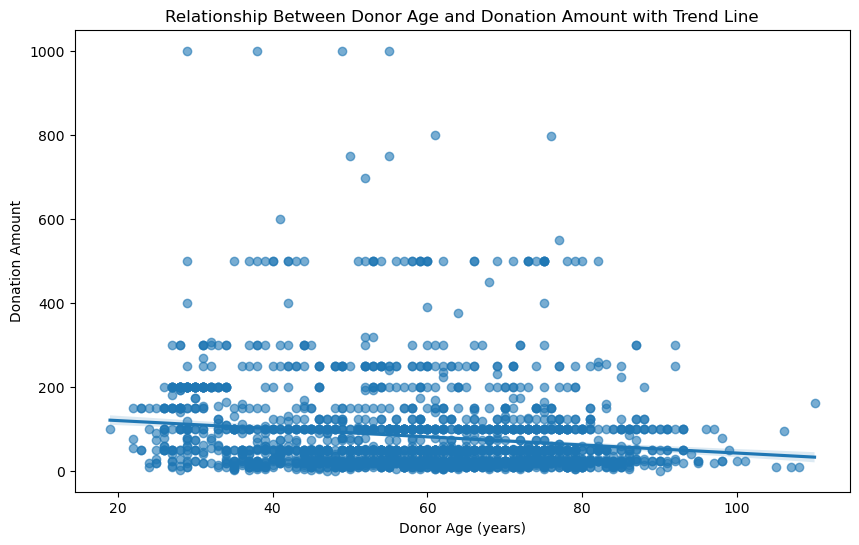

In [24]:
# Greatest gift amount of donors by age 

# # Remove commas and convert to float, then to integer
donors['Greatest gift amount'] = donors['Greatest gift amount'].str.replace(',', '').astype(float).astype(int)

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Greatest gift amount', data=donors, scatter_kws={'alpha':0.6})

# Add titles and labels
plt.title('Relationship Between Donor Age and Donation Amount with Trend Line')
plt.xlabel('Donor Age (years)')
plt.ylabel('Donation Amount')

# Display the plot
plt.show()

### Marital Status of Donors -- Distribution

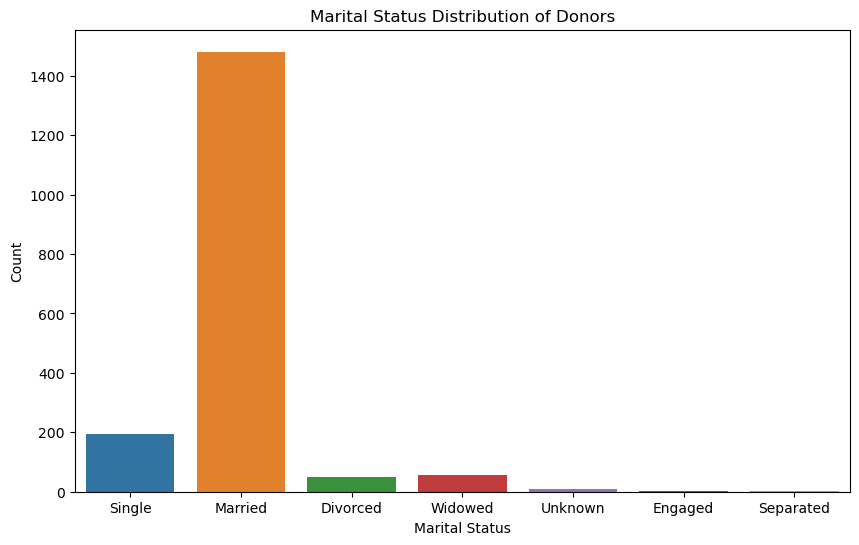

In [25]:
# Bar plot for marital status distribution by donor status 
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital status', data=donors)
plt.title('Marital Status Distribution of Donors')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.show()

### Graduation Date And First Donation Date

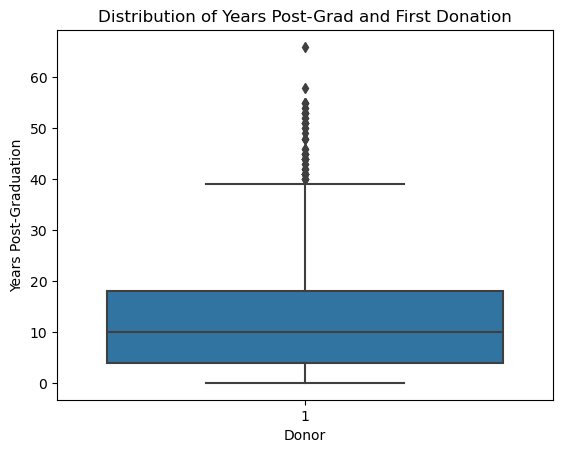

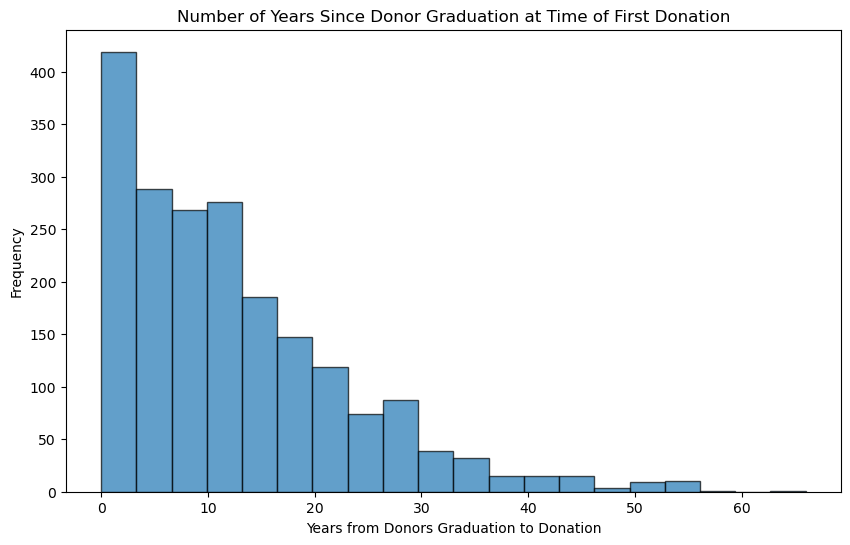

In [26]:
# Plots showing the distribution of years since graduation at time of donors' first donation 
sns.boxplot(x= 'Donor', y='years_post_grad_donation', data=donors)
plt.title("Distribution of Years Post-Grad and First Donation")
plt.xlabel('Donor')
plt.ylabel('Years Post-Graduation')
plt.show()

donors['years_post_grad_donation'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, figsize=(10, 6), title='Number of Years Since Donor Graduation at Time of First Donation')

plt.xlabel('Years from Donors Graduation to Donation')
plt.ylabel('Frequency')
plt.show()

# Logistic Regression Model Building to Predict Donor Status

In [27]:
# Creating donorYN variable
data2 = data 
data2['DonorYN'] = 0 
data2.loc[data2['Lifetime giving'] > 0, 'DonorYN'] = 1

### Logistic Regression Model: Demographic Variables as Predictors of Donor Status 

              precision    recall  f1-score   support

           0       0.10      0.01      0.01       129
           1       0.79      0.98      0.87       480

    accuracy                           0.78       609
   macro avg       0.44      0.49      0.44       609
weighted avg       0.64      0.78      0.69       609

[[  1 128]
 [  9 471]]


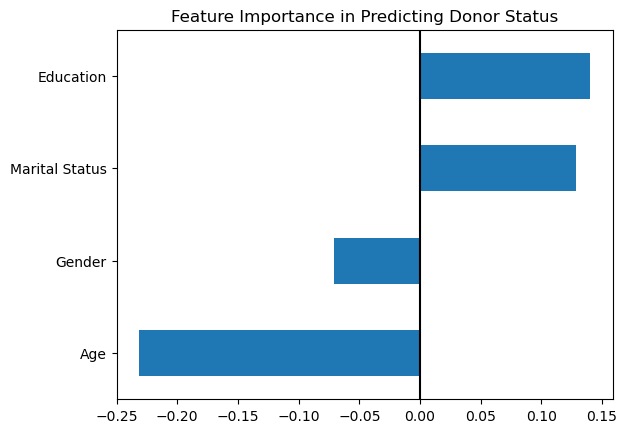

In [28]:
# Convert categorical variables to dummy variables
#df = pd.get_dummies(data2, columns=['Gender', 'Marital status'], drop_first=True)

data2['Gender2'] = LabelEncoder().fit_transform(data2['Gender'])
data2['Marital status2'] = LabelEncoder().fit_transform(data2['Marital status'])

# Define features and target
features = ['Age', 'Gender2', 'Marital status2', 'Education']
X = data2[features]
y = data2['DonorYN']  # Using the Donor column as the target

# Split the data2 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict_proba(X_test)[:,1]>.65 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importance = pd.Series(model.coef_[0], index=features)
fig = importance.plot(kind='barh')
plt.title("Feature Importance in Predicting Donor Status")
labels = ('Age','Gender','Marital Status','Education')
fig.set_yticklabels(labels)
plt.axvline(.0, color="black", label="cutoff")
plt.show() 

### Age  as a Predictor for Donor Status

In [29]:
# Define features and target
features = data['Age']

X = features.array.reshape(-1, 1)
y = data['DonorYN']  # Using the Donor column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict_proba(X_test)[:,1]>.7 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance 
# Defining dummy variable to set the index to 
index1 = ['1']
importance = pd.Series(model.coef_[0], index=index1)

#importance.plot(kind='barh')
#plt.title("Feature Importance in Predicting Donors vs. Non-Donors")
#plt.show()


              precision    recall  f1-score   support

           0       0.39      0.05      0.10       129
           1       0.79      0.98      0.88       480

    accuracy                           0.78       609
   macro avg       0.59      0.52      0.49       609
weighted avg       0.71      0.78      0.71       609

[[  7 122]
 [ 11 469]]


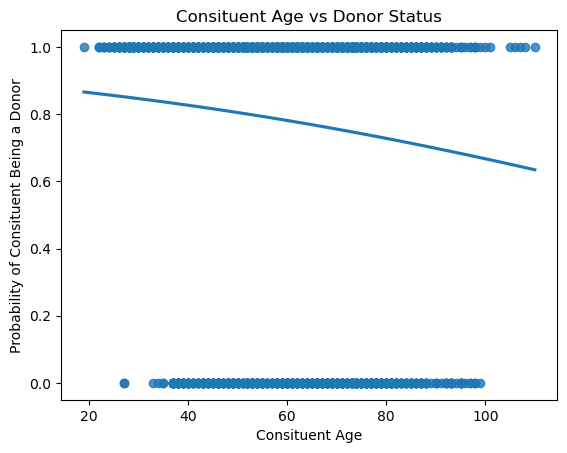

In [30]:
# Plotting Age vs Donor Status
ax = sns.regplot(x=X, y=y, data=data, logistic=True, ci=None)
ax.set(xlabel ='Consituent Age', ylabel='Probability of Consituent Being a Donor', title= "Consituent Age vs Donor Status")
plt.show()
 

### Marital Status as a Predictor for Donor Status

#### Marital Status values: 'Single', 'Married', 'Widowed', 'Divorced', 'Unknown','Partner', 'Engaged', 'Separated'

              precision    recall  f1-score   support

           0       0.62      0.08      0.14       129
           1       0.80      0.99      0.88       480

    accuracy                           0.79       609
   macro avg       0.71      0.53      0.51       609
weighted avg       0.76      0.79      0.73       609

[[ 10 119]
 [  6 474]]


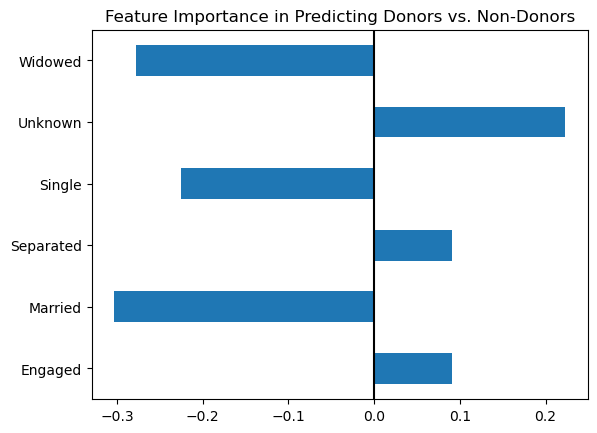

In [31]:
# Define features and target
df = pd.get_dummies(data[['Marital status']], columns=['Marital status'], drop_first=True)
 
X = df
y = data['DonorYN']  # Using the Donor column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict_proba(X_test)[:,1]>.6 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importance = pd.Series(model.coef_[0], index=df.columns)
fig = importance.plot(kind='barh')

#Defining bar labels
marriage = ('Engaged','Married','Separated', 'Single','Unknown', 'Widowed')
fig.set_yticklabels(marriage)
plt.title("Feature Importance in Predicting Donors vs. Non-Donors")
plt.axvline(.0, color="black", label="cutoff")

plt.show()

### Adjusting for Inflation -- Donor First Donation Amounts

In [32]:
data_inflated = data.copy()
data_inflated.columns

Index(['ConstituentID', 'City', 'State', 'Postcode', 'Country',
       'Constituent codes', 'Lifetime giving', 'First gift amount',
       'First gift type', 'First gift date', 'First gift fund',
       'Latest gift amount', 'Latest gift type', 'Latest gift date',
       'Latest gift fund', 'Greatest gift amount', 'Greatest gift type',
       'Greatest gift date', 'Greatest gift fund', 'Birthdate', 'Age',
       'AgeInMonths', 'PrimaryEmployment', 'Education', 'Gender',
       'Marital status', 'Solicit codes', 'Student Organizations', 'Arts',
       'Fraternal Organizations', 'Men's Athletics', 'Scholarship Recipient',
       'Women's Athletics', 'Age_FirstDonation', 'graduation_year', 'Recency',
       'Frequency', 'MonetaryValue', 'EngagementScore', 'Donor',
       'first_gift_year', 'years_post_grad_donation', 'DonorYN', 'Gender2',
       'Marital status2'],
      dtype='object')

In [33]:
#Writing a function to adjust all monetary columns for inflation
def inflate_column(data, column):
    """
    Adjust for inflation the series of values in column of the   
    dataframe data
    """
    return data.apply(lambda x: cpi.inflate(x[column], 
                      x.first_gift_year), axis=1)

In [34]:
# Converting to float for calculation 
data_inflated['First gift amount'] = data_inflated['First gift amount'].str.replace(',', '').astype(float).astype(int)

In [50]:
data_inflated['first_gift_year'].value_counts()

first_gift_year
2004    251
2002    231
2003    201
1970    160
2010    155
1999    151
1989    129
2000    121
2011    111
2008    110
2007     97
2014     91
2015     89
1990     81
2013     76
1986     58
1988     58
2006     55
2001     54
1987     54
2009     53
2005     48
2016     46
1991     45
2021     44
2019     41
2022     41
2024     40
2018     40
2012     39
2017     39
2020     36
2023     35
1998     31
1996     25
1997     21
1993     19
1992     19
1994     17
1995     15
1985     13
1982      1
Name: count, dtype: int64

In [36]:
data_inflated['First_donation_adjusted'] = inflate_column(data_inflated, 'First gift amount') 

CPIObjectDoesNotExist: Index of annual type for 2024-01-01 does not exist